In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
os.getcwd()

'C:\\Users\\GC\\AA\\회귀분석'

In [3]:
# 데이터 불러오기
boston=pd.read_csv("part2_data/Boston_house.csv")

In [4]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [8]:
# target 제외한 데이터만 뽑기
boston_data=boston.drop(['Target'],axis=1)

In [9]:
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [10]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

### crim/ rm  / Istat 세 개의 변수로 각각 단순 선형 회귀 분석하기

In [14]:
## 변수 설정 target / crim/ rm / lstat
target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

### target ~ crim 선형회귀 분석

In [18]:
# crim 변수에 상수항 추가하기
crim1=sm.add_constant(crim,has_constant="add")
crim1

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [20]:
# sm.OLS 적합시키기
# 베타0 + 베타1
model1=sm.OLS(target,crim1)
              # Y값, data
fitted_model1=model1.fit()
# 회귀분석 함수 분석 수행

In [28]:
# summary 함수를 통해 결과 출력
fitted_model1.summary()

# R-quared : y의 총 변동성 중 crim 의 변동률은 15% 이다
# 이때 범죄율은 -0.4152 만큼 감소하고, P>|t| 값이 0에 가까울수록 신뢰도가 올라간다
    # -> 회귀계수 = -0.4152 이다


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.17e-19
Time:                        11:50:16   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
## 회귀계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

### y_hat = beta0 + beta1 * X 계산해보기

In [25]:
# 회귀계수 * 데이터(X)
np.dot(crim1,fitted_model1.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [30]:
# predict 함수를 통해 y hat 값 구하기
pred1= fitted_model1.predict(crim1)
pred1

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

In [27]:
# 직접구한 yhat 과 predict 함수를 통해 구한 yhat 차이
np.dot(crim1,fitted_model1.params)-pred1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

### 적합시킨 직선 시각화

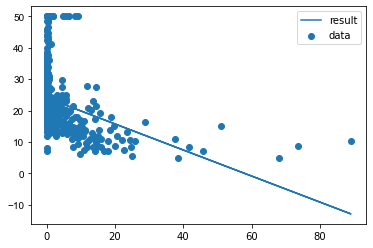

In [32]:
import matplotlib.pyplot as plt
plt.yticks(fontname="Arial")
plt.scatter(crim, target, label='data')
plt.plot(crim, pred1, label='result')
plt.legend()
plt.show()
# 직선이 잘 맞지는 않은 것 같다,,,

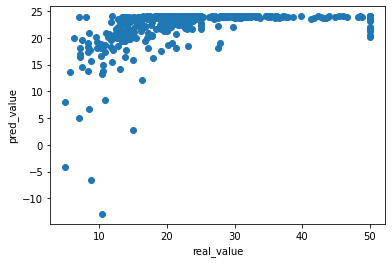

In [33]:
plt.scatter(target, pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

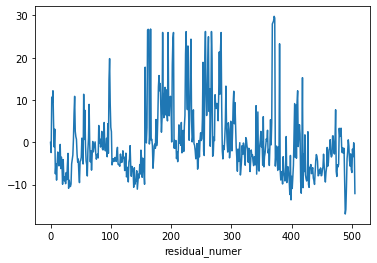

In [35]:
## residual 시각화  -> 잔차
fitted_model1.resid.plot()
plt.xlabel("residual_numer")
plt.show()
# 그래프 해석 -> 범죄율을 가지고 추정하기에는 부적합함

In [36]:
# 잔차합 계산해보기
np.sum(fitted_model1.resid)

-3.353761712787673e-12

# target ~ rm 단순 선형 회귀 분석하기

In [46]:
# 상수항 추가
rm1=sm.add_constant(rm,has_constant="add")
rm1

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
...,...,...
501,1.0,6.593
502,1.0,6.120
503,1.0,6.976
504,1.0,6.794


In [47]:
# sm.OLS 적합시키기
model2=sm.OLS(target,rm1)
fitted_model2=model2.fit()

In [48]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           2.49e-74
Time:                        13:49:07   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# 회귀계수 출력하기
fitted_model2.params


const   -34.670621
RM        9.102109
dtype: float64

In [57]:
# predict 함수로 y hat 구하기
pred2= fitted_model2.predict(rm1)
pred2

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [54]:
# y_hat = beta0 + beta1 * x 계산하기
np.dot(rm1,fitted_model2.params)

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [58]:
np.dot(rm1,fitted_model1.params)-pred2

0     -3.872516
1     -2.406852
2     -9.678068
3     -7.898333
4     -9.316411
         ...   
501   -4.043827
502    0.457855
503   -7.688953
504   -5.956804
505    1.314412
Length: 506, dtype: float64

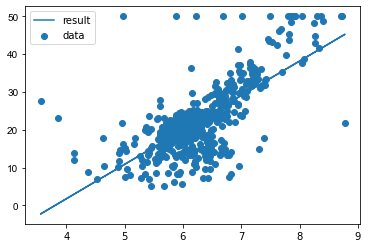

In [59]:
plt.yticks(fontname="Arial")
plt.scatter(rm, target, label='data')
plt.plot(rm, pred2, label='result')
plt.legend()
plt.show()

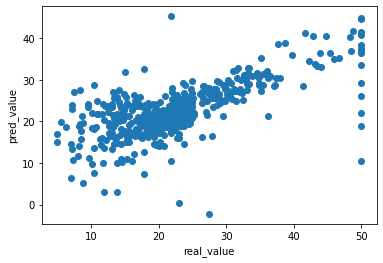

In [60]:
plt.scatter(target, pred2)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

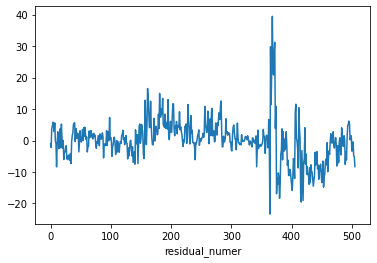

In [61]:
## residual 시각화  -> 잔차
fitted_model2.resid.plot()
plt.xlabel("residual_numer")
plt.show()
# 그래프 해석 -> 범죄율을 갖

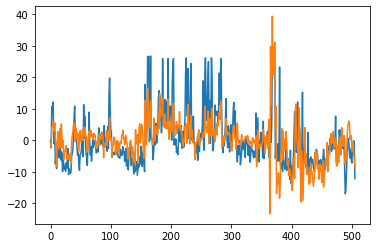

In [62]:
# 두 모델의 residual 비교
fitted_model1.resid.plot(label='crim')
fitted_model2.resid.plot(label='rm')
